In [66]:
import matplotlib.pyplot as plt
import json
import numpy as np


In [67]:
# 1: model well-specified, prior good
# 2: model well-specified, prior bad
# 3: model misspecified, prior good
# 4: model misspecified, prior bad
settings = {}
settings[1] = {"if_misspecified": False, "y": 0.0}
settings[2] = {"if_misspecified": False, "y": 5.0}
settings[3] = {"if_misspecified": True, "y": 0.0}
settings[4] = {"if_misspecified": True, "y": 5.0}

In [68]:
simulation_i = "grunwald"
setting_i = 2
y = settings[setting_i]["y"]
if_misspecified = settings[setting_i]["if_misspecified"]
d_x = 20  # number of fourier features
n_train = 100
lambs = np.linspace(0.0, 30.0, 301)
var_prior_1 = 0.01
var_prior_2 = 0.1
var_prior_3 = 1.0

In [69]:
with open(f'grunwald_{setting_i}_{n_train}_{d_x}.json') as json_file:
    data = json.load(json_file)

In [70]:
results_1=data[str(var_prior_1)]
results_2=data[str(var_prior_2)]
results_3=data[str(var_prior_3)]

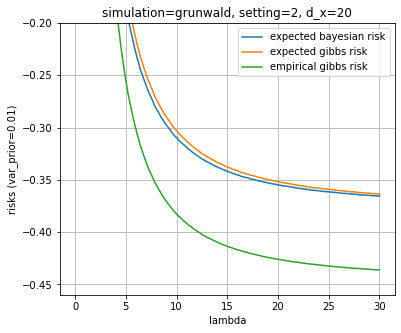

In [71]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, results_1['bayes_risks'], label="expected bayesian risk")
plt.plot(lambs, results_1['gibbs_risks'], label="expected gibbs risk")
plt.plot(lambs, results_1['emp_gibbs_risks'], label="empirical gibbs risk")
plt.xlabel("lambda")
plt.ylabel(f"risks (var_prior={var_prior_1})")
plt.title(f"simulation={simulation_i}, setting={setting_i}, d_x={d_x}")
plt.ylim(-0.46,-0.2)
plt.legend()
plt.savefig(f"{simulation_i}_risks_{setting_i}_{n_train}_{d_x}.jpg", bbox_inches="tight", dpi=300)
plt.show()

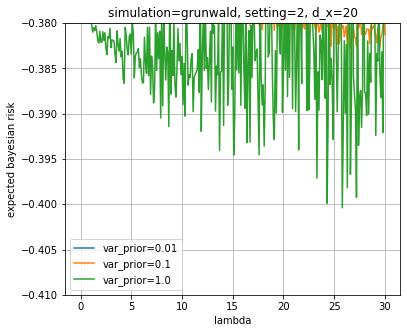

In [72]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, results_1['bayes_risks'], label=f"var_prior={var_prior_1}")
plt.plot(lambs, results_2['bayes_risks'], label=f"var_prior={var_prior_2}")
plt.plot(lambs, results_3['bayes_risks'], label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("expected bayesian risk")
plt.ylim(-0.41,-0.38)
# plt.xlim(0,30)
plt.title(f"simulation={simulation_i}, setting={setting_i}, d_x={d_x}")
plt.legend()
plt.savefig(f"{simulation_i}_bayes_risks_{setting_i}_{n_train}_{d_x}.jpg", bbox_inches="tight", dpi=300)
plt.show()

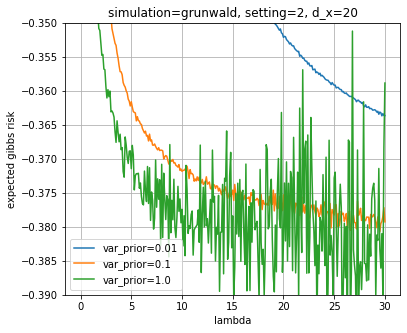

In [73]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, results_1['gibbs_risks'], label=f"var_prior={var_prior_1}")
plt.plot(lambs, results_2['gibbs_risks'], label=f"var_prior={var_prior_2}")
plt.plot(lambs, results_3['gibbs_risks'], label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("expected gibbs risk")
plt.ylim(-0.39,-0.35)
# plt.xlim(-0.1,30)
plt.title(f"simulation={simulation_i}, setting={setting_i}, d_x={d_x}")
plt.legend()
plt.savefig(f"{simulation_i}_gibbs_risks_{setting_i}_{n_train}_{d_x}.jpg", bbox_inches="tight", dpi=300)
plt.show()


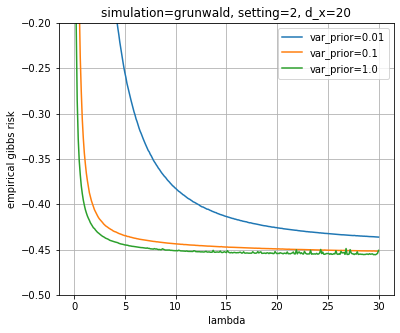

In [74]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, results_1['emp_gibbs_risks'], label=f"var_prior={var_prior_1}")
plt.plot(lambs, results_2['emp_gibbs_risks'], label=f"var_prior={var_prior_2}")
plt.plot(lambs, results_3['emp_gibbs_risks'], label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("empirical gibbs risk")
plt.ylim(-0.5,-0.2)
plt.title(f"simulation={simulation_i}, setting={setting_i}, d_x={d_x}")
plt.legend()
plt.savefig(f"{simulation_i}_emp_gibbs_risks_{setting_i}_{n_train}_{d_x}.jpg", bbox_inches="tight", dpi=300)
plt.show()

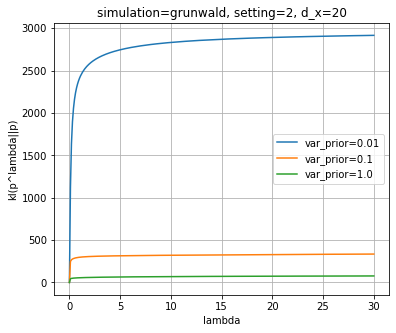

In [75]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, results_1['kls'], label=f"var_prior={var_prior_1}")
plt.plot(lambs, results_2['kls'], label=f"var_prior={var_prior_2}")
plt.plot(lambs, results_3['kls'], label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("kl(p^lambda||p)")
plt.title(f"simulation={simulation_i}, setting={setting_i}, d_x={d_x}")
plt.legend()
plt.savefig(f"{simulation_i}_kls_{setting_i}_{n_train}_{d_x}.jpg", bbox_inches="tight", dpi=300)
plt.show()

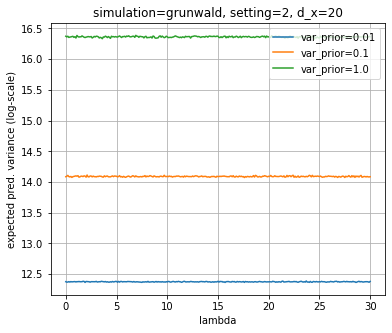

In [76]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, np.log(results_1['vars_prior_pred']), label=f"var_prior={var_prior_1}")
plt.plot(lambs, np.log(results_2['vars_prior_pred']), label=f"var_prior={var_prior_2}")
plt.plot(lambs, np.log(results_3['vars_prior_pred']), label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("expected pred. variance (log-scale)")
plt.title(f"simulation={simulation_i}, setting={setting_i}, d_x={d_x}")
plt.legend()
plt.savefig(f"{simulation_i}_var_{setting_i}_{n_train}_{d_x}.jpg", bbox_inches="tight", dpi=300)
plt.show()

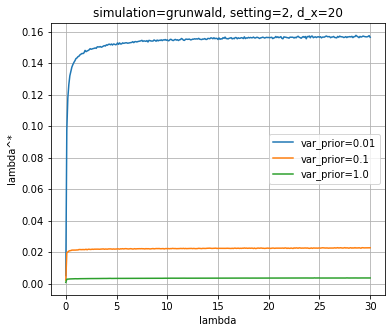

In [77]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, results_1['lambs_optimal'], label=f"var_prior={var_prior_1}")
plt.plot(lambs, results_2['lambs_optimal'], label=f"var_prior={var_prior_2}")
plt.plot(lambs, results_3['lambs_optimal'], label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("lambda^*")
plt.title(f"simulation={simulation_i}, setting={setting_i}, d_x={d_x}")
plt.legend()
plt.savefig(f"{simulation_i}_lambda*_{setting_i}_{n_train}_{d_x}.jpg", bbox_inches="tight", dpi=300)
plt.show()

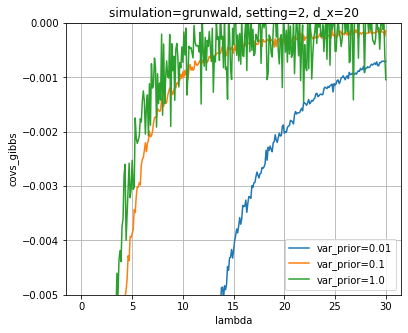

In [78]:
fig = plt.figure(figsize=(6, 5))
plt.grid()
plt.plot(lambs, results_1["covs_gibbs"], label=f"var_prior={var_prior_1}")
plt.plot(lambs, results_2["covs_gibbs"], label=f"var_prior={var_prior_2}")
plt.plot(lambs, results_3["covs_gibbs"], label=f"var_prior={var_prior_3}")
plt.xlabel("lambda")
plt.ylabel("covs_gibbs")
plt.title(f"simulation={simulation_i}, setting={setting_i}, d_x={d_x}")
plt.legend()
plt.ylim(-0.005,0.0)
plt.savefig(f"{simulation_i}_covs_gibbs_{setting_i}_{n_train}_{d_x}.jpg", bbox_inches="tight", dpi=300)
plt.show()